## Required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

## Load data

In [5]:
train = pd.read_csv("train.csv", parse_dates=['date'])
oil = pd.read_csv("oil.csv", parse_dates=['date'])
holidays = pd.read_csv("holidays_events.csv", parse_dates=['date'])

## Step 1: Univariate Analysis

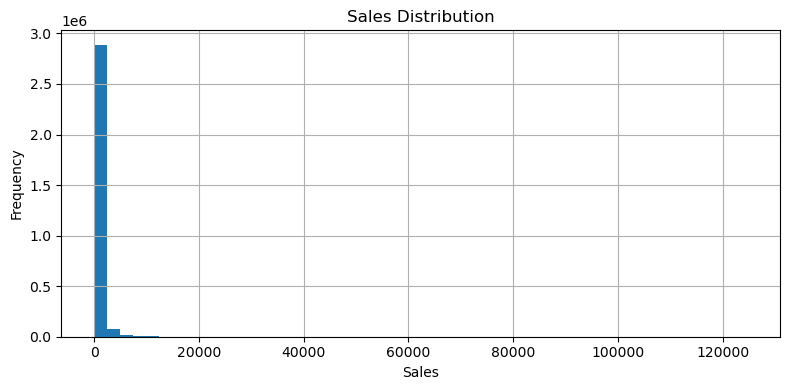

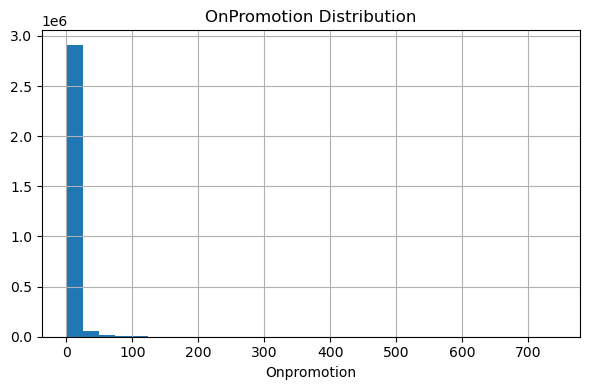

In [8]:
plt.figure(figsize=(8, 4))
train['sales'].hist(bins=50)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
train['onpromotion'].hist(bins=30)
plt.title('OnPromotion Distribution')
plt.xlabel('Onpromotion')
plt.tight_layout()
plt.show()

## Step 2: Bivariate Analysis

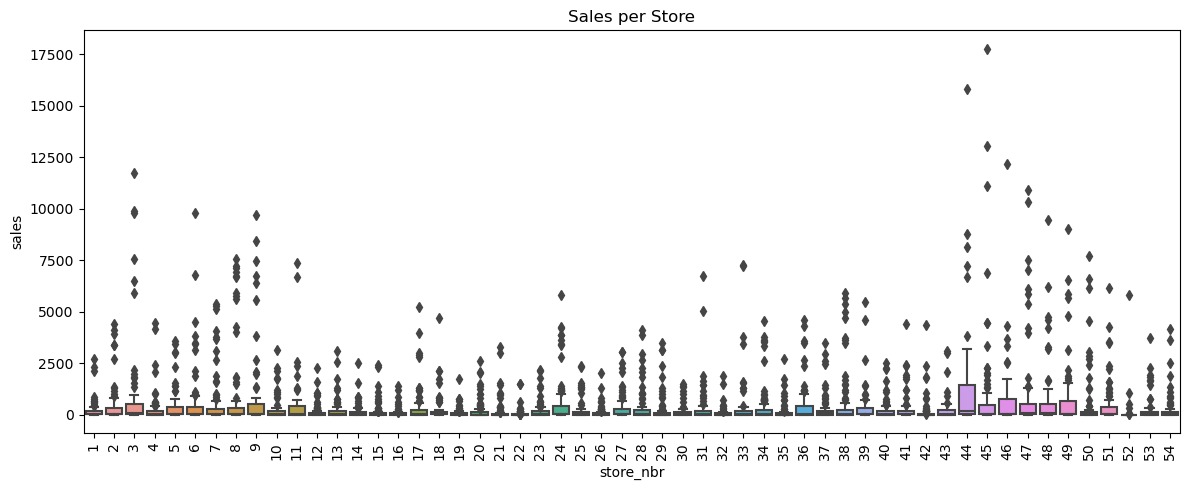

In [11]:
plt.figure(figsize=(12, 5))
sample = train.sample(5000)
sns.boxplot(x='store_nbr', y='sales', data=sample)
plt.title('Sales per Store')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Step 3: Merge external data

In [14]:
train = train.merge(oil, on='date', how='left')
train['dcoilwtico'].fillna(method='ffill', inplace=True)

## Step 4: Forecasting with SARIMA

In [19]:
# Select one store-family pair for modeling
store_nbr = 1
family = 'GROCERY I'

# Filter data
combo_data = train[(train['store_nbr'] == store_nbr) & (train['family'] == family)]
combo_data = combo_data.set_index('date').resample('D').sum()  # daily sales
combo_data['sales'].fillna(0, inplace=True)

# SARIMA Model
model = SARIMAX(combo_data['sales'], order=(1,1,1), seasonal_order=(1,1,1,7))
model_fit = model.fit(disp=False)

# Forecast for next 30 days
forecast = model_fit.forecast(30)

## Step 5: Plot Forecast

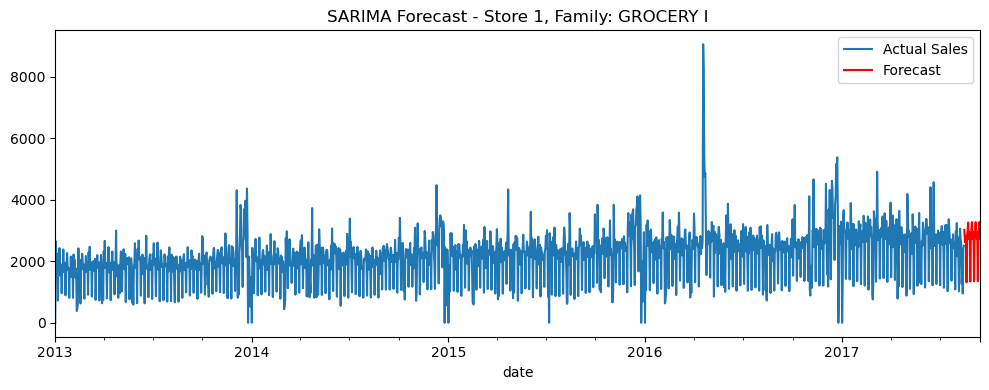

In [22]:
plt.figure(figsize=(10, 4))
combo_data['sales'].plot(label='Actual Sales')
forecast.plot(label='Forecast', color='red')
plt.legend()
plt.title(f'SARIMA Forecast - Store {store_nbr}, Family: {family}')
plt.tight_layout()
plt.show()
